# Instructions for processing ALOS-2 data for creating and visualizing RGB composites using Python

You would first need to download and load the ALOS-2 data using a library like rasterio. Let's assume you have downloaded and preprocessed the ALOS-2 data as GeoTIFF files.

In [1]:
pip install rasterio

  Using cached rasterio-1.3.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl.metadata (3.4 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached rasterio-1.3.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21.7 MB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.colors as colors

## Load the ALOS-2 images

This Python code snippet is for loading and reading two ALOS-2 SAR (Synthetic Aperture Radar) images using the rasterio library, which is commonly used for working with geospatial raster data.

In [3]:
# Load the ALOS-2 images
image_path1 = '/home/jovyan/shared/Sirinya/alos/ALOS2210180680-180414_cut.tif'
image_path2 = '/home/jovyan/shared/Sirinya/alos/ALOS2222600680-180707_cut.tif'  # Update the path for the second image

with rasterio.open(image_path1) as src1, rasterio.open(image_path2) as src2:
    image1 = src1.read(1)  # First band of the first image
    image2 = src2.read(1)  # First band of the second image
    transform1 = src1.transform
    transform2 = src2.transform

## Apply a Speckle Filter

This code applies a focal mean filter to the two SAR images (image1 and image2) to reduce speckle noise. Speckle is a common issue in SAR images, and the focal mean (also called a moving average filter) helps smooth the image by averaging pixel values in a local neighborhood.

In [4]:
# Apply a focal mean filter to reduce speckle noise
def focal_mean(image, size=3):
    kernel = np.ones((size, size)) / (size * size)
    return ndimage.convolve(image, kernel, mode='reflect')

image1_filtered = focal_mean(image1, size=30)
image2_filtered = focal_mean(image2, size=30)

## Visualize the ALOS-2 images

This code is used to visualize the original and filtered versions of the first SAR image (e.g. image1 and image1_filtered) without applying any geospatial transformations. It utilizes Matplotlib to display the images in a side-by-side format.

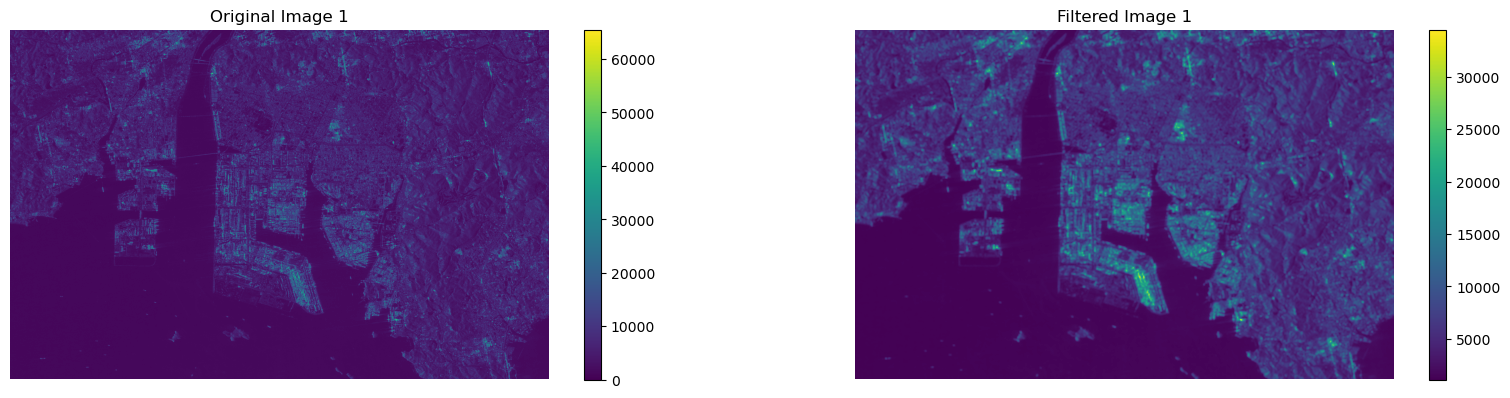

In [5]:
# Visualize the images without transform
plt.figure(figsize=(20, 10))
 
# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.colorbar()
plt.title('Original Image 1')
plt.axis('off')
 
# Display the filtered image
plt.subplot(2, 2, 2)
plt.imshow(image1_filtered)
plt.colorbar()
plt.title('Filtered Image 1')
plt.axis('off')
 
plt.show()

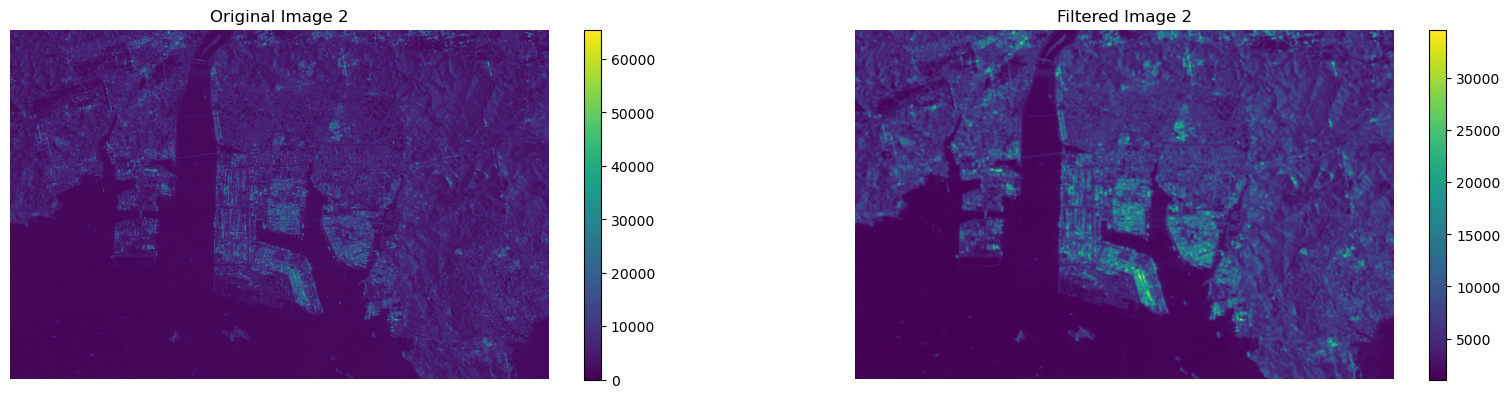

In [6]:
# Visualize the images without transform
plt.figure(figsize=(20, 10))
 
# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image2)
plt.colorbar()
plt.title('Original Image 2')
plt.axis('off')
 
# Display the filtered image
plt.subplot(2, 2, 2)
plt.imshow(image2_filtered)
plt.colorbar()
plt.title('Filtered Image 2')
plt.axis('off')
 
plt.show()

## Computing and Visualizing Histogram with Statistical Annotations

This code computes the histogram of an image, showing the distribution of pixel intensities, and plots it using matplotlib. The histogram bins (hist) are computed along with the image's mean and variance. The plot is then annotated with red dashed lines for the mean and green dashed lines for ±1 standard deviation (SD), representing variance. Text labels indicate these values on the graph, and the figure includes titles, axis labels, and gridlines for better readability of pixel intensity distribution.

In [7]:
# Compute histograms for the original and filtered images of Image 1
def plot_histogram(image, title):
    hist, bin_edges = np.histogram(image, bins=255)
    mean_val = np.mean(image)
    var_val = np.var(image)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

    # Annotate the mean and variance on the plot
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    plt.text(mean_val, max(hist) * 0.9, f'Mean: {mean_val:.2f}', color='red')

    plt.axvline(mean_val + np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(mean_val - np.sqrt(var_val), color='green', linestyle='dashed', linewidth=2)
    plt.text(mean_val + np.sqrt(var_val), max(hist) * 0.8, f'+1 SD: {np.sqrt(var_val):.2f}', color='green')
    plt.text(mean_val - np.sqrt(var_val), max(hist) * 0.8, f'-1 SD: {np.sqrt(var_val):.2f}', color='green')

    # Add titles and labels
    plt.title(f'Histogram of {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

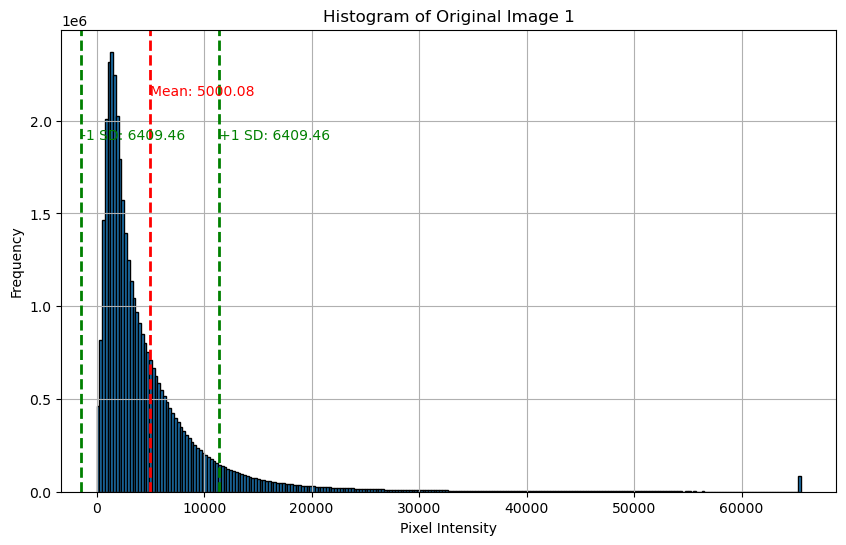

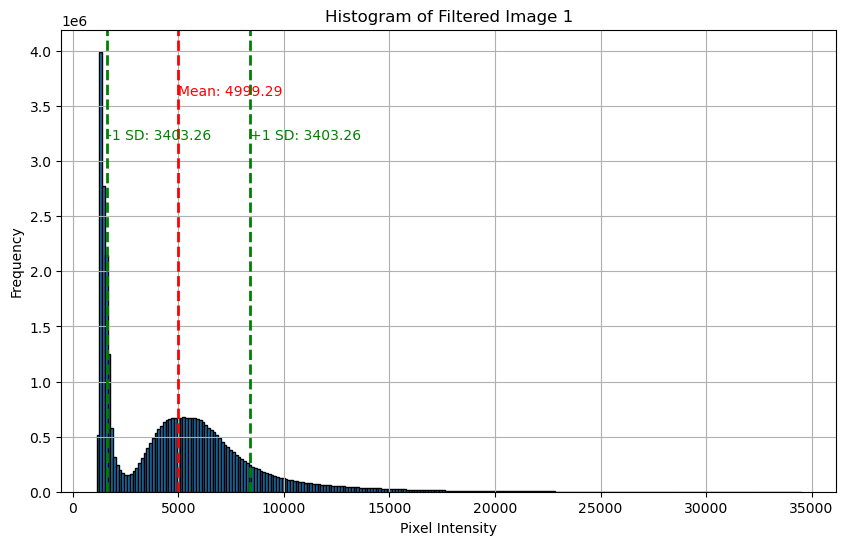

In [8]:
# Plot histograms for both images and their filtered versions
plot_histogram(image1, 'Original Image 1')
plot_histogram(image1_filtered, 'Filtered Image 1')

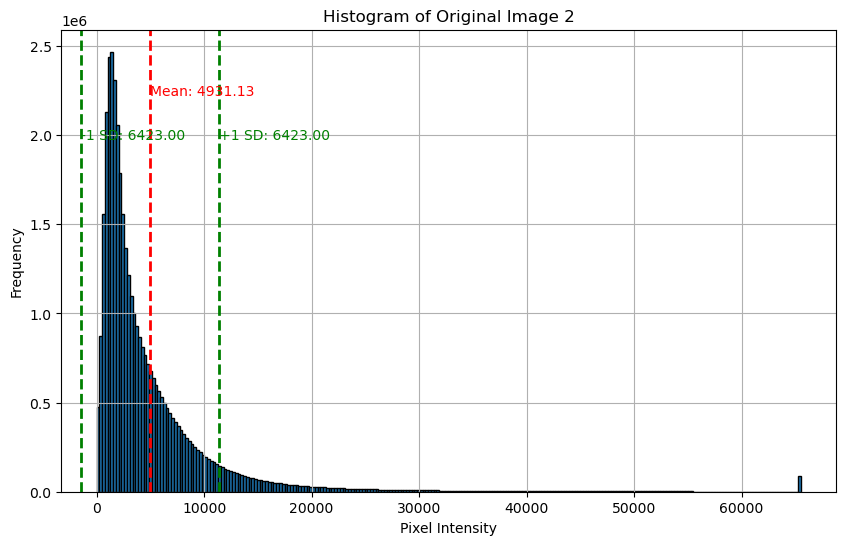

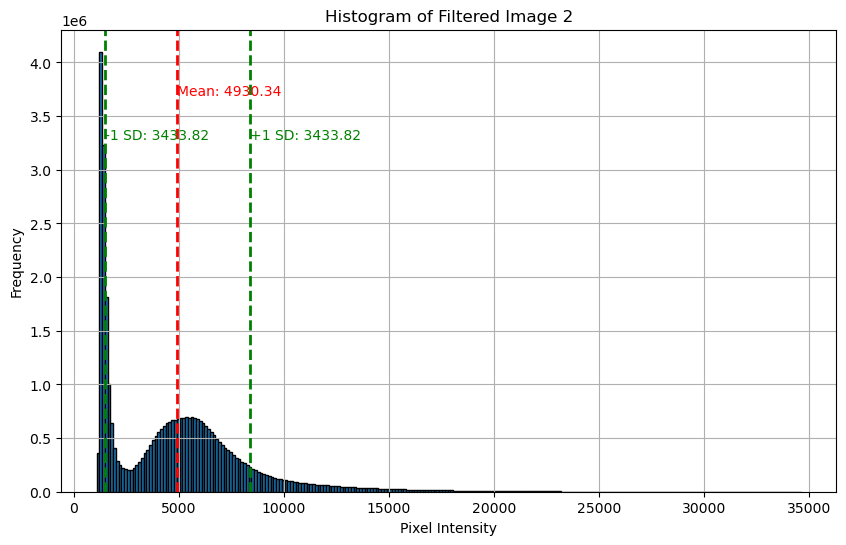

In [9]:
plot_histogram(image2, 'Original Image 2')
plot_histogram(image2_filtered, 'Filtered Image 2')

## Creating the Temporal RGB Composite

The red channel is assigned to image1_filtered.
The green channel is assigned to image2_filtered.
The blue channel is left as zeros for now, but you can assign a third image or create an artificial band.
If you have multiple bands (e.g., different polarization data from ALOS-2), you could create more detailed false-color composites by combining those bands.

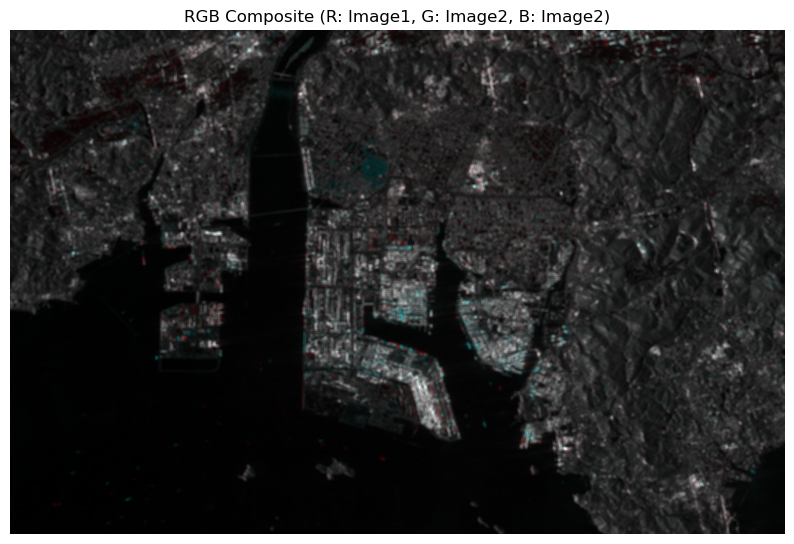

In [10]:
# Normalize the images to the range [0, 1] for display
def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Normalize the filtered images
image1_norm = normalize(image1_filtered)
image2_norm = normalize(image2_filtered)

# Set the Blue channel to zero
# blue_channel = np.zeros_like(image1_norm)

# Create an RGB composite with Blue channel set to zero
rgb_composite = np.dstack((image1_norm, image2_norm, image2_norm))

# Display the RGB composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb_composite)
plt.title('RGB Composite (R: Image1, G: Image2, B: Image2)')
plt.axis('off')
plt.show()


## Increase contrast in the RGB composite

This code is used to improve the visual contrast of an RGB image composite by applying contrast stretching to each color channel separately and then displaying the enhanced image. This can help make key features in the image stand out more for visual interpretation.

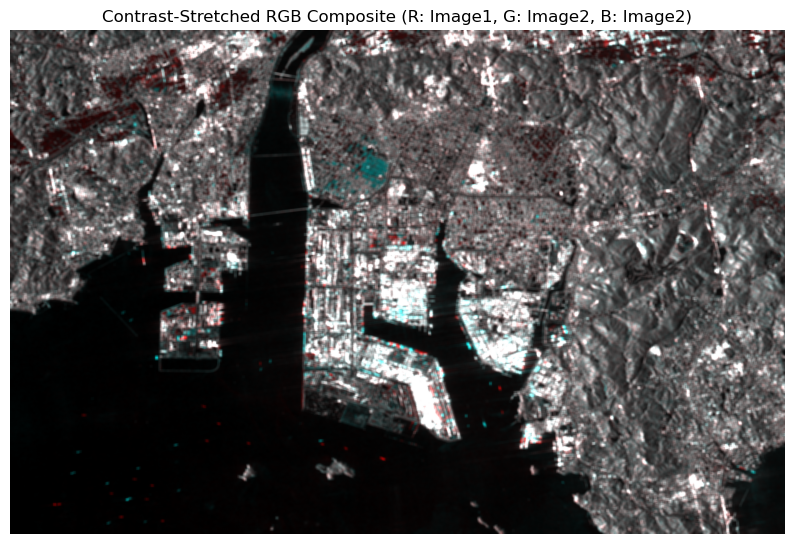

In [11]:
# Contrast stretching function with epsilon to avoid division by zero
def contrast_stretch(image, eps=1e-5):
    p2, p98 = np.percentile(image, (2, 98))  # Use the 2nd and 98th percentiles to stretch contrast
    return np.clip((image - p2) / (p98 - p2 + eps), 0, 1)

# Apply contrast stretching to each channel of the RGB composite
rgb_composite_stretched = np.zeros_like(rgb_composite)
for i in range(3):  # Loop over the R, G, B channels
    rgb_composite_stretched[:, :, i] = contrast_stretch(rgb_composite[:, :, i])

# Display the contrast-stretched RGB composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb_composite_stretched)
plt.title('Contrast-Stretched RGB Composite (R: Image1, G: Image2, B: Image2)')
plt.axis('off')
plt.show()

## Explanation for visualizing RGB composites using Python

The visual output produced by the RGB composites highlights temporal changes between two ALOS-2 SAR images captured on April 14 and July 7. In the composite, areas that remain unchanged between the two dates are displayed in gray scale, resulting from the combination of RGB. The red regions indicate areas where objects or structures were present only on April 14, suggesting that they were removed or altered by July 7. Conversely, blue regions represent areas where objects appeared only in the July 7 image, indicating new developments or changes that occurred during this time. This type of visualization effectively highlights changes in infrastructure, land use, or other features over time, using the filtered images for precise change detection.